# House Prices: Advanced regression techniques - Kaggle - Top 18%

Predict sale prices of residential homes in Ames, Iowa

## Importing libraries for data pre processing, analyzing and visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('F:/DS/Datasets/IowaHousing/train.csv')

In [3]:
df_test = pd.read_csv('F:/DS/Datasets/IowaHousing/test.csv')

In [4]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [6]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Fill in the missing values in training data.

In [9]:
trainMV = df_train.isnull().sum()
trainMV[trainMV.values > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Filling LotFrontage based on average LotFrontage of houses in that particular neighborhood.

In [10]:
avgLotFrontage = df_train.groupby(by='Neighborhood').LotFrontage.mean()

for val in df_train[pd.isnull(df_train.LotFrontage)].Id.index:
    nbrhod = df_train.loc[val].Neighborhood
    df_train.loc[val, 'LotFrontage'] = avgLotFrontage[nbrhod]

### The remaining missing values are filled appropriately using the data dictionary. Columns with a lot of missing values are dropped.

In [11]:
df_train.MasVnrArea.fillna(value=0, inplace=True)
df_train.MasVnrType.fillna(value='None', inplace=True)
df_train.Electrical.fillna(value=df_train.Electrical.mode()[0], inplace=True)

In [12]:
df_train.GarageYrBlt.fillna(value=0, inplace=True)
na_list = ['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu'
          ]

for item in na_list:
    df_train[item].fillna(value='NA', inplace=True)

In [13]:
df_train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'PoolArea', 'Id'], inplace=True)

In [14]:
df_train.isnull().sum().sum()

0

## Fill in the missing values in test data.
Same methods used for filling training data are used for test data as well.

In [15]:
testMV = df_test.isnull().sum()
testMV[testMV.values > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [16]:
avgLotFrontage = df_train.groupby(by='Neighborhood').LotFrontage.mean()
for val in df_test[pd.isnull(df_test.LotFrontage)].Id.index:
    nbrhod = df_test.loc[val].Neighborhood
    df_test.loc[val, 'LotFrontage'] = avgLotFrontage[nbrhod]

In [17]:
mode_list = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']
for item in mode_list:
    df_test[item].fillna(value=df_test[item].mode()[0], inplace=True)
    

zero_list = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
             'GarageYrBlt', 'GarageArea', 'GarageCars'
            ]
for item in zero_list:
    df_test[item].fillna(value=0, inplace=True)
    

test_na_list = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'
               ]
for item in test_na_list:
    df_test[item].fillna(value='NA', inplace=True)

df_test.MasVnrType.fillna(value='None', inplace=True)
df_test.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'PoolArea'], inplace=True)

In [18]:
df_test.isnull().sum().sum()

0

In [19]:
print(df_train.shape)
print(df_test.shape)

(1460, 75)
(1459, 75)


## Converting categorical columns into numerical columns.
A lot of categorical columns have ordinal values. We apply the **rating** function to such columns.

In [20]:
def rating(val):
    if val == 'Ex':
        return 5
    elif val == 'Gd':
        return 4
    elif val == 'TA':
        return 3
    elif val == 'Fa':
        return 2
    elif val == 'Po':
        return 1
    else:
        return 0

In [21]:
cat_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu']

for col in cat_cols:
    df_train[col] = df_train[col].apply(rating)
    df_test[col] = df_train[col].apply(rating)

## Creating new features using existing features and dropping irrelevant features.

In [22]:
df_train['BsmtBath'] = df_train['BsmtFullBath'] + df_train['BsmtHalfBath']
df_train['AbvGrBath'] = df_train['FullBath'] + df_train['HalfBath']
df_train['TotalBath'] = df_train['BsmtBath'] + df_train['AbvGrBath']

df_test['BsmtBath'] = df_test['BsmtFullBath'] + df_test['BsmtHalfBath']
df_test['AbvGrBath'] = df_test['FullBath'] + df_test['HalfBath']
df_test['TotalBath'] = df_test['BsmtBath'] + df_test['AbvGrBath']

In [23]:
df_train['TotalPorchSF'] = df_train['WoodDeckSF'] + df_train['OpenPorchSF'] + df_train['EnclosedPorch'] \
                           + df_train['3SsnPorch'] + df_train['ScreenPorch']

df_test['TotalPorchSF'] = df_test['WoodDeckSF'] + df_test['OpenPorchSF'] + df_test['EnclosedPorch'] \
                           + df_test['3SsnPorch'] + df_test['ScreenPorch']


df_train.drop(columns=['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace=True)
df_test.drop(columns=['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace=True)

In [24]:
print(df_train.shape)
print(df_test.shape)

(1460, 74)
(1459, 74)


## Visualizations and Outliers removal

In [25]:
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = 10, 6

### Overall Quality vs Sale Price

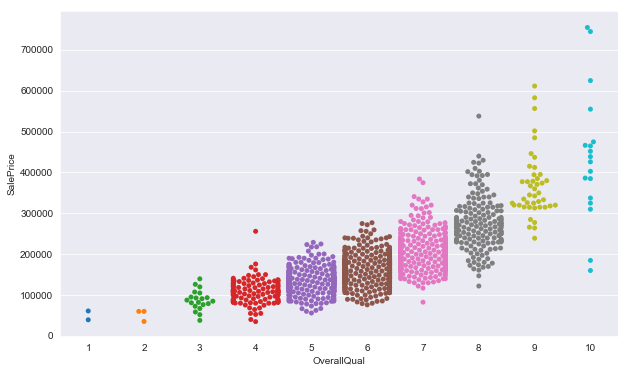

In [26]:
sns.swarmplot(data=df_train, x='OverallQual', y='SalePrice')
plt.show()

In [27]:
df_train = df_train[~((df_train['OverallQual'] == 4) & (df_train['SalePrice']>200000))]
df_train = df_train[~((df_train['OverallQual'] == 7) & (df_train['SalePrice']<100000))]
df_train = df_train[~((df_train['OverallQual'] == 8) & (df_train['SalePrice']>500000))]
df_train = df_train[~((df_train['OverallQual'] == 10) & (df_train['SalePrice']<200000))]

### After removing outliers.

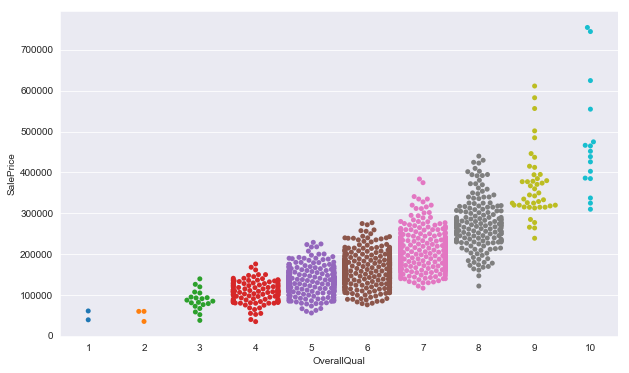

In [28]:
sns.swarmplot(data=df_train, x='OverallQual', y='SalePrice')
plt.show()

---

### Living Area vs Sale Price 

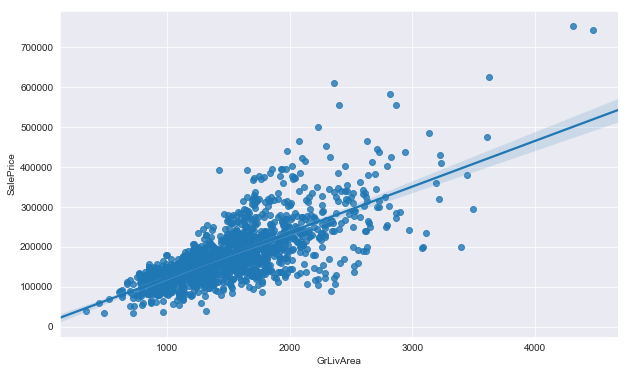

In [29]:
sns.regplot(data=df_train, x='GrLivArea', y='SalePrice')
plt.show()

### No outliers to remove here

---

### Exterior Quality vs Sale Price

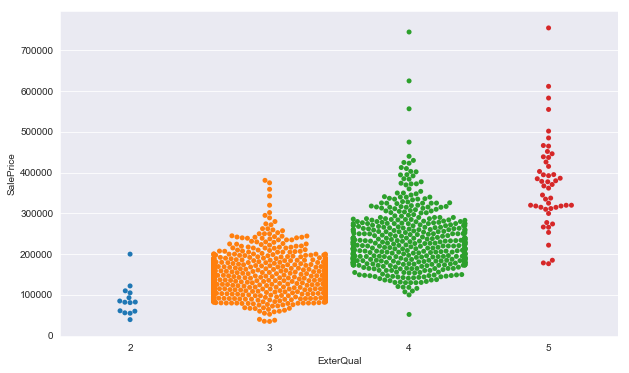

In [30]:
sns.swarmplot(data=df_train, x='ExterQual', y='SalePrice')
plt.show()

In [31]:
df_train = df_train[~((df_train['ExterQual'] == 4) & ((df_train['SalePrice'] < 100000) | (df_train['SalePrice'] > 500000)))]
df_train = df_train[~((df_train['ExterQual'] == 2) & (df_train['SalePrice'] > 180000))]

### After removing outliers

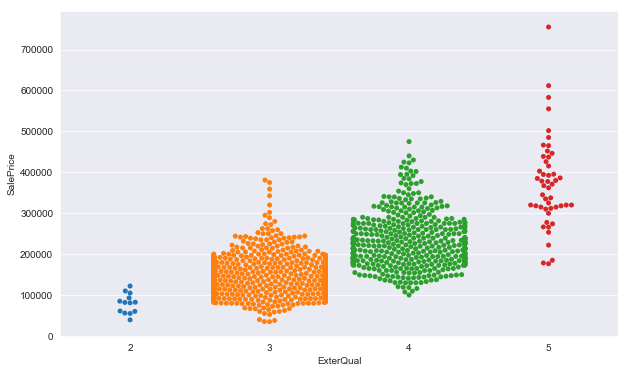

In [32]:
sns.swarmplot(data=df_train, x='ExterQual', y='SalePrice')
plt.show()

---

## Data preparation for ML models

In [33]:
for col in df_train.select_dtypes(include=np.number).columns:
    df_train[col] = np.log1p(df_train[col])
    
Id = df_test['Id']
for col in df_test.select_dtypes(include=np.number).columns:
    df_test[col] = np.log1p(df_test[col])

In [34]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [35]:
#from sklearn.preprocessing import LabelEncoder

In [36]:
#le = LabelEncoder()
#for col in df_train.select_dtypes(include=np.object).columns:
 #   df_train[col] = le.fit_transform(df_train[col].values)
    
#for col in df_test.select_dtypes(include=np.object).columns:
 #   df_test[col] = le.fit_transform(df_test[col].values)

In [37]:
print(df_train.shape)
print(df_test.shape)

(1450, 256)
(1459, 241)


In [38]:
#from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [39]:
#X, y = df_train.drop(columns='SalePrice'), df_train.SalePrice
#selector = SelectKBest(mutual_info_regression, k=25)
#selector.fit(X, y)
#mask = selector.get_support()
#features = X.columns[mask]
#features = list(features)
#features.append('SalePrice')

#df_train = df_train[features]
#features.remove('SalePrice')
#df_test = df_test[features]

## Importing libraries for our ML models

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [41]:
kf = KFold(n_splits=10)
drop_col = list(df_train.columns ^ df_test.columns)
drop_col.remove('Id')
X_train = df_train.drop(columns=drop_col)
y_train = df_train.SalePrice
X_test = df_test.drop(columns='Id')

In [42]:
def rmse_val(model):
    score = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error'))
    return score.mean()

## Ridge Regression

In [43]:
#ridge = Ridge()
#param_grid = {'alpha': np.arange(0.1, 20.1, 0.1)}
#grid = GridSearchCV(ridge, param_grid, refit=True, cv=kf)
#grid.fit(X_train, y_train)
#grid.best_params_

In [44]:
ridge = Ridge(alpha=6.2)
print('Ridge Regression RMSE: ', rmse_val(ridge))

Ridge Regression RMSE:  0.11261578085157656


In [45]:
ridge.fit(X_train, y_train)
ridge_test_pred = np.expm1(ridge.predict(X_test))

## Gradient Boosting Regressor

In [46]:
gbRegressor = GradientBoostingRegressor()

In [47]:
#param_grid = {'learning_rate': [1, 0.1, 0.05, 0.01, 0.001 ],
 #             'max_depth': [3, 4, 5],
  #           'loss': ['huber', 'ls', 'lad', 'quantile'],
   #           'max_features': ['auto', 'sqrt', 'log2'],
    #           'n_estimators': [100, 200, 300, 400, 500]
     #      }
#grid = GridSearchCV(gbRegressor, param_grid, refit=True, cv=kf)
#grid.fit(X_train, y_train)
#grid.best_params_

In [48]:
gbRegressor.n_estimators = 500
print('GB Regressor RMSE: ', rmse_val(gbRegressor))

GB Regressor RMSE:  0.11399167107215183


In [49]:
gbRegressor.fit(X_train, y_train)
gbRegressor_test_pred = np.expm1(gbRegressor.predict(X_test))

## XGradient Boosting Regressor

In [50]:
xgbRegressor = xgb.XGBRegressor()

In [51]:
#param_grid = {'learning_rate': [1, 0.1, 0.05, 0.01, 0.001 ],
 #             'max_depth': [3, 4, 5],
  #            'n_estimators': [100, 200, 300, 400, 500]
   #          }

#grid = GridSearchCV(xgbRegressor, param_grid, refit=True, cv=kf)
#grid.fit(X_train, y_train)
#grid.best_params_

In [52]:
xgbRegressor.n_estimators = 300
print('XGB Regressor RMSE: ', rmse_val(xgbRegressor))

XGB Regressor RMSE:  0.1124471610564802


In [53]:
xgbRegressor.fit(X_train, y_train)
xgbRegressor_test_pred = np.expm1(xgbRegressor.predict(X_test))

## Lasso

In [54]:
#param_grid = {'lasso__alpha': np.arange(0.0001, 0.0009, 0.00001)}
#pipe_lasso = make_pipeline(RobustScaler(), Lasso())
#grid = GridSearchCV(pipe_lasso, param_grid, refit=True, cv=kf)
#grid.fit(X_train, y_train)
#grid.best_params_

In [55]:
pipe_lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.00035))
print('Lasso RMSE: ', rmse_val(pipe_lasso))

Lasso RMSE:  0.11056741193957739


In [56]:
pipe_lasso.fit(X_train, y_train)
lasso_test_pred = np.expm1(pipe_lasso.predict(X_test))

## Averaging Models

In [57]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    #Clone the models, train the cloned models
    def fit(self, X_train, y_train):
        self.cl_models = [clone(model) for model in self.models]
        
        for model in self.cl_models:
            model.fit(X_train, y_train)

        return self
    
    #Predict values for cloned models and return average of predictions
    def predict(self, X_train):
        predictions = np.column_stack([
            model.predict(X_train) for model in self.cl_models
        ])
        return np.mean(predictions, axis=1)

In [58]:
averaged_models = AveragingModels(models = (ridge, pipe_lasso, gbRegressor, xgbRegressor))
print('Averaging Models RMSE: ', rmse_val(averaged_models))

Averaging Models RMSE:  0.10528520996339308


In [59]:
averaged_models.fit(X_train, y_train)
avg_test_pred = np.expm1(averaged_models.predict(X_test))

## Stacking Regressors

In [60]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    
    def __init__(self, base_models, meta_model):
        self.base_models = base_models
        self.meta_model = meta_model

    '''
    OOFP has 1450 rows(Train shape) with 3 columns since we are using 3 base models.
    In each iteration of inner for loop, the rows get filled up in the i th column based on holdout index
    which is decided by kfold split. 
    Eventually, all the 1450 rows get filled up with predictions for each model in base models.
    
    '''
        
    def fit(self, X, y):
        
        #Cannot clone model here because we need self.cl_base_models as a list which gets appended
        #with a model instance for a particular kfold split.
        self.cl_base_models = [list() for model in self.base_models]
        self.cl_meta_model = clone(self.meta_model)
        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        
        #Train cloned base models, then create out-of-fold predictions
        #that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models))) 
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.cl_base_models[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        #Meta model is trained on OOFP and y which is the training data target variable
        self.cl_meta_model.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.cl_base_models])
        return self.cl_meta_model.predict(meta_features)
    
    '''
    t1,t2,t3,t4,t5 = training folds
    self.cl_base_models = [[m1t1,m1t2,m1t3,m1t4,m1t5], [m2t1,m2t2,m2t3,m2t4,m2t5], [m3t1,m3t2,m3t3,m3t4,m3t5]]
    base_models = [m1t1,m1t2,m1t3,m1t4,m1t5], [m2t1,m2t2,m2t3,m2t4,m2t5], [m3t1,m3t2,m3t3,m3t4,m3t5]
    model = m1t1,m1t2,m1t3,m1t4,m1t5,m2t1,m2t2,m2t3,m2t4,m2t5,m3t1,m3t2,m3t3,m3t4,m3t5

    inside inner np.column_stack:
    iter 1 : Predict 1459 values using m1t1 model to get [p1m1t1.....p1459m1t1]
    ...
    iter5 : Predict 1459 values using m1t5 model to get [p1m1t5.....p1459m1t5]
    np.column_stack([p1m1t1.....p1459m1t1],..., [p1m1t5.....p1459m1t5]) will give me
    [[p1m1t1, p1m1t2..., p1m1t5],
     [p2m1t1, p2m1t2..., p2m1t5],
     ..
     [p1m1t1, p1m1t2..., p1m1t5]
    ] 

    Mean of the above along axis=1
    [avgP1(M1), avgP2(M1), ..., avgP1459(M1)]

    The above gets repeated for the other 2 base models and we end up with the following in the outer column stack:
    
    np.column_stack([avgP1(M1), avgP2(M1)...avgP1459(M1),..., avgP1(M3), avgP2(M3)...avgP1459(M3)]) which is transformed to
    
    [[avgP1(M1) avgP1(M2) avgP1(M3)],
    ...
     [avgP1459(M1) avgP1459(M2) avgP1459(M3)]
    ]
    
    '''

In [61]:
stacked_averaged_models = StackingAveragedModels(base_models = (pipe_lasso, gbRegressor),
                                                 meta_model = ridge)
print('Stacked Regressor RMSE: ', rmse_val(stacked_averaged_models))

Stacked Regressor RMSE:  0.10506577590024013


In [62]:
stacked_averaged_models.fit(X_train, y_train)
sam_test_pred = np.expm1(stacked_averaged_models.predict(X_test))

In [63]:
ensemble = sam_test_pred*0.60 + lasso_test_pred*0.25 + xgbRegressor_test_pred*0.15

In [65]:
sub = pd.DataFrame({'Id': Id, 'SalePrice': ensemble})
sub.to_csv('F:/DS/Datasets/IowaHousing/gb_submission.csv', index=False)

### Above solution is ranked 843 which puts it in the top 18% as on December 23rd 2018.